In [1]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from coffea import hist, processor
import coffea
import uproot

from coffea.analysis_tools import Weights, PackedSelection

import sys
sys.path.insert(0,"../")
# from corrections import add_pileup_weight

import pickle
import glob

In [2]:
import mplhep as hep
plt.style.use(hep.style.CMS) 

In [3]:
import HNLprocessor.corrections as corrections

xsections = corrections.load_xsection()

# with open('../HNL_histograms_signals_Jul28.pickle','rb') as f:
with open('../HNL_histograms_Jul30.pickle','rb') as f:    
    out = pickle.load(f)
    
    
lumi = 137 ## fb
# lumi = 0.939 ## fb
    
for k,h in out.items():
    print(k,)
    if (type(h)!=hist.Hist): continue
    h.scale({ d: lumi for d in h.identifiers("dataset") if d.name in xsections.keys()}, axis="dataset")
#     print({ d:lumi for d in h.identifiers("dataset") if d.name in xsections.keys()})

sumw
nCluster
accept
ClusterSize
dphi_cluster_MET
dphi_cluster_lep
metXYCorr
MT
nPU
gWPt
gWPt_noweight
nPU_noweight


In [4]:
out

{'sumw': defaultdict_accumulator(float,
                         {'EGamma_2018A': 22198219.0,
                          'HNL_electronType_mHNL7p0_pl1000': 661246.0,
                          'HNL_electronType_mHNL1p0_pl100': 659831.0,
                          'HNL_testpoint1': 151269.0,
                          'HNL_electronType_mHNL1p0_pl1000': 661983.0,
                          'HNL_electronType_mHNL2p0_pl100': 661076.0,
                          'HNL_electronType_mHNL2p0_pl1000': 659066.0,
                          'HNL_electronType_mHNL4p0_pl100': 661978.0,
                          'HNL_electronType_mHNL4p0_pl1000': 660231.0,
                          'HNL_electronType_mHNL7p0_pl100': 661539.0,
                          'HNL_electronType_mHNL7p0_pl10000': 660151.0,
                          'HNL_electronType_mHNL10p0_pl100': 659380.0,
                          'HNL_electronType_mHNL10p0_pl1000': 660862.0,
                          'HNL_electronType_mHNL10p0_pl10000': 659548.0,


<AxesSubplot:xlabel='gLLP_csc', ylabel='Events'>

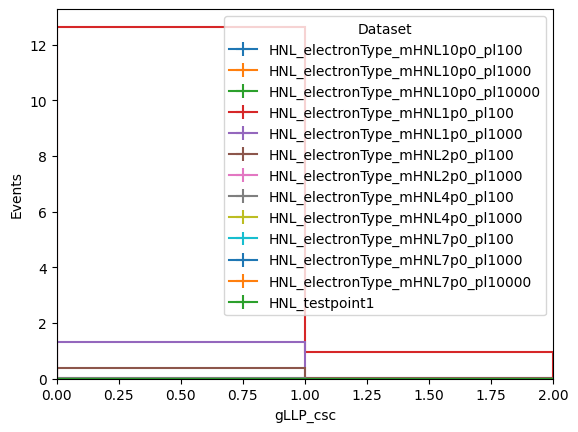

In [50]:
hist.plot1d(out['accept'],density=False)

In [10]:
import HNLprocessor.corrections as corrections

xsections = corrections.load_xsection()
masses = [1,2,4,5,7,10]
ctaus = [100,1000,10000,127000]
data={}
for m in masses:
    data[m]={"ct":[],"acc":[],"xsec":[]}
    for c in ctaus:    
        k= "HNL_electronType_mHNL%sp0_pl%s"%(m,c)
        if (k,) in out['accept'].values().keys():
            v = out['accept'].values()[(k,)]
            data[m]["ct"].append(c)
            data[m]["acc"].append(v[1]/v.sum())
            data[m]["xsec"].append(xsections[k])   
        elif (c==127000 and m==5):
            k = "HNL_testpoint1"
            v = out['accept'].values()[(k,)]
            data[m]["ct"].append(c)
            data[m]["acc"].append(v[1]/v.sum())
            data[m]["xsec"].append(xsections[k])   
            
data        

{1: {'ct': [100, 1000],
  'acc': [0.06965419933285946, 0.02361541006340042],
  'xsec': [135.7, 13.57]},
 2: {'ct': [100, 1000],
  'acc': [0.05378655404219787, 0.03984729905654365],
  'xsec': [4.238, 0.4238]},
 4: {'ct': [100, 1000],
  'acc': [0.0257561429533912, 0.05875216401532191],
  'xsec': [0.1289, 0.01289]},
 5: {'ct': [127000], 'acc': [0.029193026991650637], 'xsec': [1.724e-05]},
 7: {'ct': [100, 1000, 10000],
  'acc': [0.008826388164567772, 0.0694491913750707, 0.018121611570686102],
  'xsec': [0.007452, 0.0007452, 7.45e-05]},
 10: {'ct': [100, 1000, 10000],
  'acc': [0.0034456610755558247, 0.07043376680759372, 0.02482609302128124],
  'xsec': [0.00121, 0.000121, 1.21e-05]}}

In [38]:
cw_data={1:
    {"ct":np.array([0.04140455204,0.4140446516,4.140455204,5.175688737,6.900819971,10.35121729,20.70244543])*1000,
     "acc":np.array([4.78,4.29,0.61,0.50,0.36,0.32,0.12])*0.01,
     "xsec":np.array([154.01,15.401,1.5401,1.2321,0.92406,0.61604,0.30802]),
    },
    2:{
       "ct":np.array( [0.01292671238,0.1292671238,0.1615836137,0.2154428071,0.3231675978,0.6463322318,1.29267,12.92671])*1000,
        "acc":np.array([0.0006,0.0634,6.55,6.37,6.37,5.00,3.31,0.34])*0.01,
        "xsec":np.array([15.389,1.5389,1.2312,0.92336,0.61557,0.30779,0.15389,0.015389])
    },
 4:{
"ct":np.array([0.03950,0.04937485081,0.06583313442,0.09875019581,0.1974985137,0.39500,0.4937485081,0.6583313442,0.9875019581,1.974985137,3.95001])*1000,
"acc":np.array([0.39,0.73,1.07,2.70,5.25,6.57,6.47,6.54,5.47,3.68,2.15])*0.01 ,
"xsec":np.array([0.15337,0.1227,0.092023,0.061349,0.030674,0.015337,0.01227,0.0092023,0.0061349,0.0030674,0.0015337])
 },
         
}

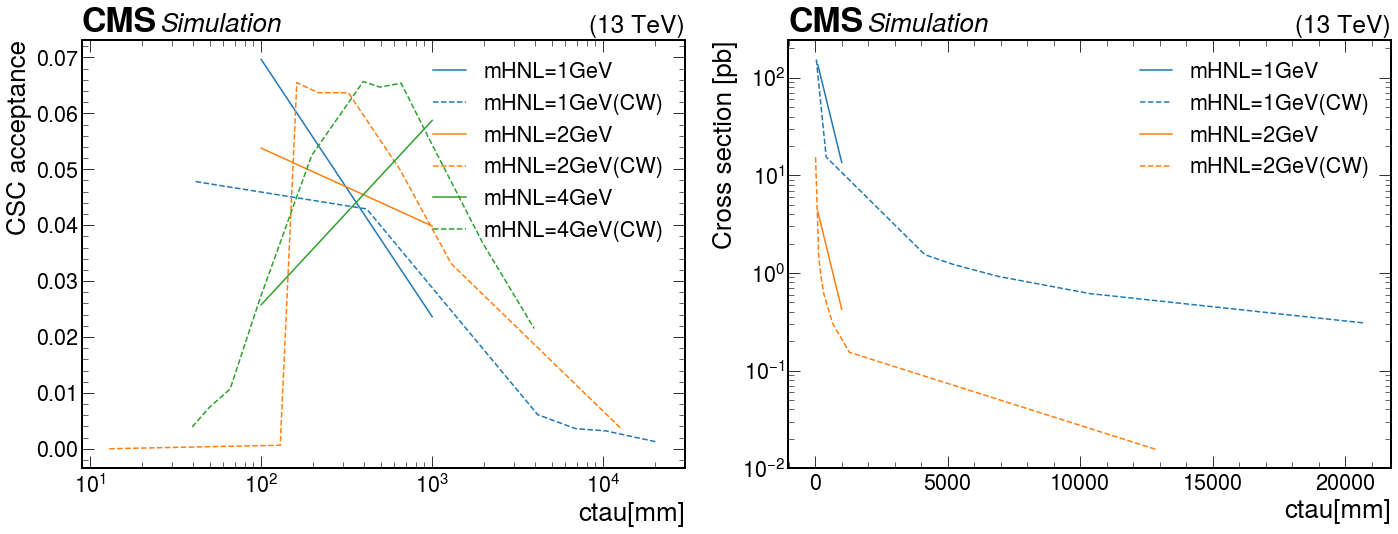

In [39]:
import mplhep as hep
plt.style.use(hep.style.CMS)  # or ATLAS/LHCb

fig, axs = plt.subplots(1,2,figsize=(20,8))
axs = axs.flatten()
l = axs[0].errorbar(data[1]["ct"],data[1]["acc"],label="mHNL=1GeV")
axs[0].errorbar(cw_data[1]["ct"],cw_data[1]["acc"],label="mHNL=1GeV(CW)",c=l.lines[0].get_color(),ls='--')
l=axs[0].errorbar(data[2]["ct"],data[2]["acc"],label='mHNL=2GeV')
axs[0].errorbar(cw_data[2]["ct"],cw_data[2]["acc"],label="mHNL=2GeV(CW)",c=l.lines[0].get_color(),ls='--')
l=axs[0].errorbar(data[4]["ct"],data[4]["acc"],label='mHNL=4GeV')
axs[0].errorbar(cw_data[4]["ct"],cw_data[4]["acc"],label="mHNL=4GeV(CW)",c=l.lines[0].get_color(),ls='--')

# axs[0].errorbar(data[7]["ct"],data[7]["acc"],label='mHNL=7GeV')
# axs[0].errorbar(data[10]["ct"],data[10]["acc"],label='mHNL=10GeV',marker="+")
axs[0].set_xlabel("ctau[mm]")
axs[0].set_ylabel("CSC acceptance")
axs[0].set_xscale('log')

l=axs[1].errorbar(data[1]["ct"],data[1]["xsec"],label="mHNL=1GeV")
axs[1].errorbar(cw_data[1]["ct"],cw_data[1]["xsec"],label="mHNL=1GeV(CW)",c=l.lines[0].get_color(),ls='--')
l=axs[1].errorbar(data[2]["ct"],data[2]["xsec"],label="mHNL=2GeV")
axs[1].errorbar(cw_data[2]["ct"],cw_data[2]["xsec"],label="mHNL=2GeV(CW)",c=l.lines[0].get_color(),ls='--')

axs[1].set_xlabel("ctau[mm]")
axs[1].set_ylabel("Cross section [pb]")
axs[1].set_yscale("log");axs[1].set_ylim(1e-2,None);

hep.cms.label(ax=axs[0])
hep.cms.label(ax=axs[1])
axs[0].legend()
axs[1].legend()
plt.tight_layout()

KeyError: 100

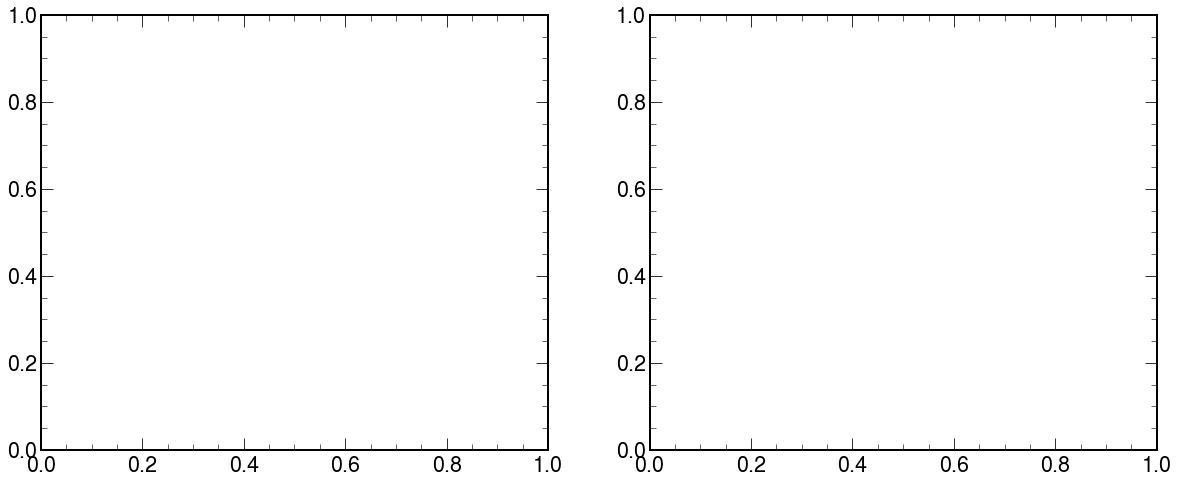

In [35]:
import mplhep as hep
plt.style.use(hep.style.CMS)  # or ATLAS/LHCb

fig, axs = plt.subplots(1,3,figsize=(20,8))
axs = axs.flatten()
axs[0].errorbar(data[100]["m"],data[100]["acc"],label="ctau=100mm")
axs[0].errorbar(data[1000]["m"],data[1000]["acc"],label='ctau=1000mm')
axs[0].errorbar(data[10000]["m"],data[10000]["acc"],label='ctau=10000mm')
axs[0].errorbar(data[127000]["m"],data[127000]["acc"],label='ctau=127000mm',marker="+")
axs[0].set_xlabel("HNL mass[GeV]")
axs[0].set_ylabel("CSC acceptance")

axs[1].errorbar(data[100]["m"],data[100]["xsec"],label="ctau=100mm")
axs[1].errorbar(data[1000]["m"],data[1000]["xsec"],label='ctau=1000mm')
axs[1].errorbar(data[10000]["m"],data[10000]["xsec"],label='ctau=10000mm')
axs[1].errorbar(data[127000]["m"],data[127000]["xsec"],label='ctau=127000mm',marker="+")
axs[1].set_xlabel("HNL mass[GeV]")
axs[1].set_ylabel("Cross section [pb]")
axs[1].set_yscale("log");axs[1].set_ylim(1e-6,None);

axs[2].errorbar(data[100]["m"],np.array(data[100]["xsec"])*np.array(data[100]["acc"]),label="ctau=100mm")
axs[2].errorbar(data[1000]["m"],np.array(data[1000]["xsec"])*np.array(data[1000]["acc"]),label='ctau=1000mm')
axs[2].errorbar(data[10000]["m"],np.array(data[10000]["xsec"])*np.array(data[10000]["acc"]),label='ctau=10000mm')
axs[2].errorbar(data[127000]["m"],np.array(data[127000]["xsec"])*np.array(data[127000]["acc"]),label='ctau=127000mm',marker="+")
axs[2].set_xlabel("HNL mass[GeV]")
axs[2].set_ylabel("Cross section x CSC acceptance [pb]")
axs[2].set_yscale("log");axs[1].set_ylim(1e-9,None);
hep.cms.label(ax=axs[0])
hep.cms.label(ax=axs[1])
hep.cms.label(ax=axs[2])
axs[0].legend()
axs[1].legend()
axs[2].legend()
plt.tight_layout()

<Cat (name=dataset) instance at 0x7ff15d514390>

In [73]:
a = out["ClusterSize"].axis('dataset')
[ s.name for s in a.identifiers()]

['EGamma_2018A',
 'HNL_electronType_mHNL10p0_pl100',
 'HNL_electronType_mHNL10p0_pl1000',
 'HNL_electronType_mHNL10p0_pl10000',
 'HNL_electronType_mHNL1p0_pl100',
 'HNL_electronType_mHNL1p0_pl1000',
 'HNL_electronType_mHNL2p0_pl100',
 'HNL_electronType_mHNL2p0_pl1000',
 'HNL_electronType_mHNL4p0_pl100',
 'HNL_electronType_mHNL4p0_pl1000',
 'HNL_electronType_mHNL7p0_pl100',
 'HNL_electronType_mHNL7p0_pl1000',
 'HNL_electronType_mHNL7p0_pl10000',
 'HNL_testpoint1',
 'WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8']

In [78]:
def relabel(h):
    a = h.axis('dataset')
    for s in a.identifiers():
        if "testpoint" in s.name or "=" in s.name or len(s.name.split("_"))==0: continue
        if "HNL" in s.name:
            m = float(s.name.split("_")[-2].replace("mHNL","").replace("p","."))
            ct = int(s.name.split("_")[-1].replace("pl",""))
        #     print("m=%s,ct=%s"%(m,ct)    )
            a.index(s).label = "m=%s,ct=%s"%(m,ct)
        elif "WJets" in s.name:
            a.index(s).label = "Wjets"
    return 

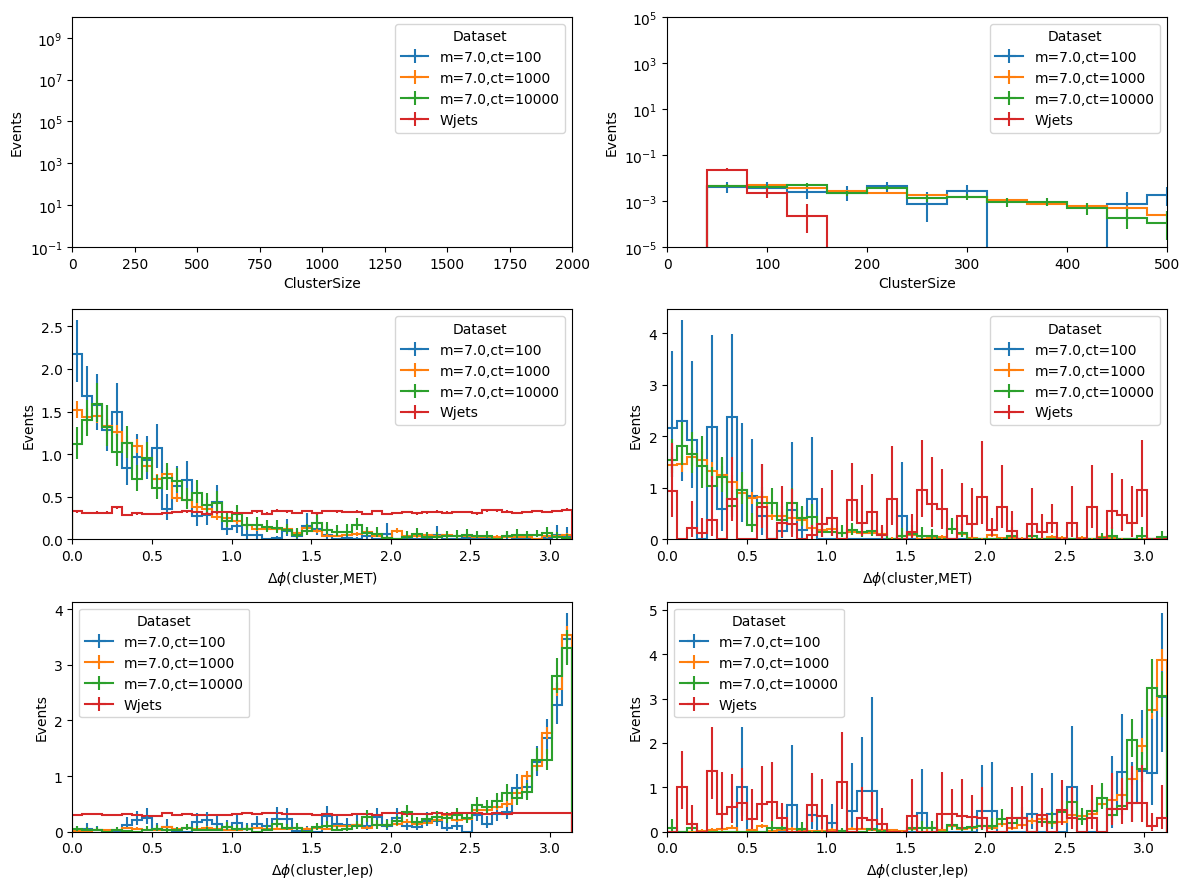

In [104]:
plt.style.use("default")
# regions = ['noselection','ele_W_CR','ele_PreSel','ele_OOT','ele_SR']
regions = ['ele_PreSel',"ele_SR"]

rm_list = [
 'HNL_electronType_mHNL1p0_pl100',
 'HNL_electronType_mHNL1p0_pl1000',
 'HNL_electronType_mHNL2p0_pl100',
 'HNL_electronType_mHNL2p0_pl1000',
 'HNL_electronType_mHNL4p0_pl100',
 'HNL_electronType_mHNL4p0_pl1000',
#  'HNL_electronType_mHNL7p0_pl100',
#  'HNL_electronType_mHNL7p0_pl1000',
#  'HNL_electronType_mHNL7p0_pl10000',
 'HNL_electronType_mHNL10p0_pl100',
 'HNL_electronType_mHNL10p0_pl1000',
 'HNL_electronType_mHNL10p0_pl10000',    
 'HNL_testpoint1',
 'EGamma_2018A',    
#  'WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8'
]


hists=[
#     'nCluster',
    'ClusterSize', 
#     'metXYCorr',
#     'MT',
# #     "nPU",
# #     "nPU_noweight",
#     "gWPt",
    'dphi_cluster_MET',
    'dphi_cluster_lep',
]

ncols=2
nrows=int(np.ceil((len(hists))*len(regions)/ncols))
figsize=(6,3)

fig, axs = plt.subplots(nrows, ncols, squeeze=False,
                        figsize=[ncols*figsize[0],nrows*figsize[1]])
axs = axs.flatten()
i=0

for p in hists:
    for j,region in enumerate(regions):
        if "SR" in region:
#             h = out[p][1:,::].integrate("region",region)    
            h = out[p].remove(["EGamma_2018A"],'dataset').integrate("region",region)                
        else:
            h = out[p].integrate("region",region)      
        if len(rm_list)>0:
            h = h.remove(rm_list,"dataset")            
        relabel(h)
        hist.plot1d(h,ax=axs[i],overlay='dataset',density=True)        
        i=i+1
axs[0].set_yscale("log");axs[0].set_ylim(1e-1,1e10);
axs[1].set_yscale("log");axs[1].set_ylim(1e-5,1e5);
axs[1].set_xlim(0,500);

# axs[2].set_yscale("log");axs[2].set_ylim(1e-5,None);
# axs[3].set_yscale("log");axs[3].set_ylim(1e-5,None);
plt.tight_layout()
plt.show()

In [ ]:
plt.style.use("default")
# regions = ['noselection','ele_W_CR','ele_PreSel','ele_OOT','ele_SR']
regions = ['ele_PreSel',"ele_SR"]

rm_list = [
 'HNL_electronType_mHNL1p0_pl100',
 'HNL_electronType_mHNL1p0_pl1000',
 'HNL_electronType_mHNL2p0_pl100',
 'HNL_electronType_mHNL2p0_pl1000',
 'HNL_electronType_mHNL4p0_pl100',
 'HNL_electronType_mHNL4p0_pl1000',
#  'HNL_electronType_mHNL7p0_pl100',
#  'HNL_electronType_mHNL7p0_pl1000',
#  'HNL_electronType_mHNL7p0_pl10000',
 'HNL_electronType_mHNL10p0_pl100',
 'HNL_electronType_mHNL10p0_pl1000',
 'HNL_electronType_mHNL10p0_pl10000',    
 'HNL_testpoint1',
 'EGamma_2018A',    
#  'WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8'
]


hists=[
#     'nCluster',
    'ClusterSize', 
#     'metXYCorr',
#     'MT',
# #     "nPU",
# #     "nPU_noweight",
#     "gWPt",
    'dphi_cluster_MET',
    'dphi_cluster_lep',
]

ncols=2
nrows=int(np.ceil((len(hists))*len(regions)/ncols))
figsize=(6,3)

fig, axs = plt.subplots(nrows, ncols, squeeze=False,
                        figsize=[ncols*figsize[0],nrows*figsize[1]])
axs = axs.flatten()
i=0

for p in hists:
    for j,region in enumerate(regions):
        if "SR" in region:
#             h = out[p][1:,::].integrate("region",region)    
            h = out[p].remove(["EGamma_2018A"],'dataset').integrate("region",region)                
        else:
            h = out[p].integrate("region",region)      
        if len(rm_list)>0:
            h = h.remove(rm_list,"dataset")            
        relabel(h)
        hist.plot1d(h,ax=axs[i],overlay='dataset',density=True)        
        i=i+1
axs[0].set_yscale("log");axs[0].set_ylim(1e-1,1e10);
axs[1].set_yscale("log");axs[1].set_ylim(1e-5,1e5);
axs[1].set_xlim(0,500);

# axs[2].set_yscale("log");axs[2].set_ylim(1e-5,None);
# axs[3].set_yscale("log");axs[3].set_ylim(1e-5,None);
plt.tight_layout()
plt.show()